## DATA LOADING

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
emotion_df = pd.read_csv('text.csv')
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
violence_df = pd.read_csv('Train.csv')
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [5]:
hate_df = pd.read_csv('labeled_data.csv')
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# DATA PREPROCESSING 

In [6]:
emotion_df.drop(columns = ['Unnamed: 0'], inplace = True)
violence_df.drop(columns = ['Tweet_ID'], inplace = True)
hate_df = hate_df[['tweet', 'class']]

In [7]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


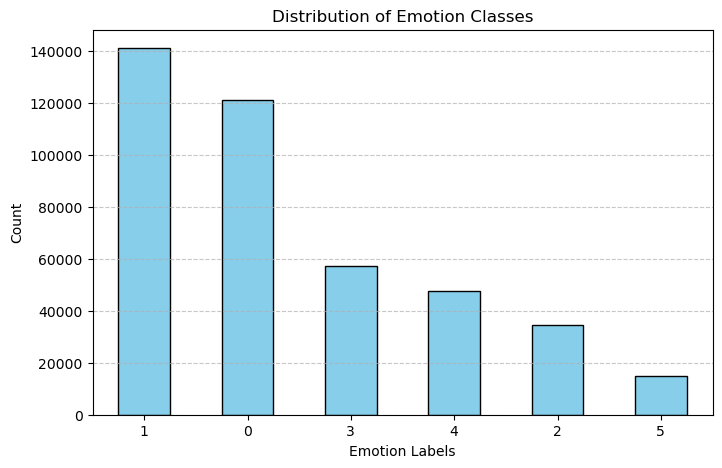

In [8]:
emotion_counts = emotion_df['label'].value_counts()

plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Emotion Labels")
plt.ylabel("Count")
plt.title("Distribution of Emotion Classes")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [9]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


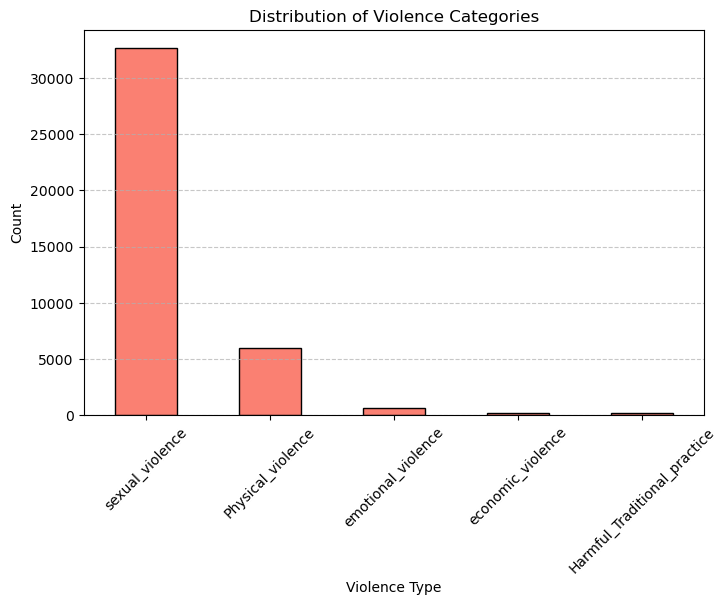

In [10]:
violence_counts = violence_df['type'].value_counts()

plt.figure(figsize=(8, 5))
violence_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.xlabel("Violence Type")
plt.ylabel("Count")
plt.title("Distribution of Violence Categories")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [11]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


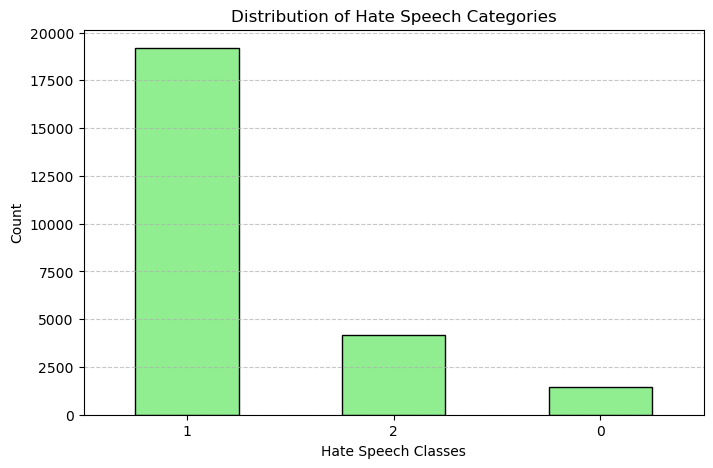

In [12]:
hate_counts = hate_df['class'].value_counts()

plt.figure(figsize=(8, 5))
hate_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.xlabel("Hate Speech Classes")
plt.ylabel("Count")
plt.title("Distribution of Hate Speech Categories")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [13]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [14]:
violence_df.rename(columns = {'tweet': 'text', 'type': 'label'}, inplace = True)
hate_df.rename(columns = {'tweet': 'text', 'class': 'label'}, inplace = True)

In [15]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [16]:
emotion_df.isnull().sum(), violence_df.isnull().sum(), hate_df.isnull().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [17]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

## BALANCING THE DATA

In [18]:
emotion_df['label'].value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

In [19]:
e_df = pd.DataFrame()
for i in range(6):
    subset = emotion_df[emotion_df['label'] == i].sample(n = 1000, random_state = 42)
    e_df = pd.concat([e_df, subset])

In [20]:
e_df.shape

(6000, 2)

In [21]:
emotion_df = e_df.copy()

In [22]:
emotion_df['label'].value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
Name: label, dtype: int64

In [23]:
violence_df['label'].value_counts()

sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: label, dtype: int64

In [24]:
sexual_violence = violence_df[violence_df['label'] == 'sexual_violence'].sample(n = 2944, random_state = 42)
physical_violence = violence_df[violence_df['label'] == 'Physical_violence'].sample(n = 2000, random_state = 42)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']
violence_df = violence_df[violence_df['label'] != 'Physical_violence']

In [25]:
violence_df.shape

(1056, 2)

In [26]:
violence_df = pd.concat([sexual_violence, violence_df], axis = 0)
violence_df = pd.concat([physical_violence, violence_df], axis = 0)

In [27]:
violence_df.shape

(6000, 2)

In [28]:
hate_df['label'].value_counts()

1    19190
2     4163
0     1430
Name: label, dtype: int64

In [29]:
one_df = hate_df[hate_df['label'] == 1].sample(n = 2570, random_state = 42)
ontwo_df = hate_df[hate_df['label'] == 2].sample(n = 2000, random_state = 42)
hate_df = hate_df[hate_df['label'] != 1]
hate_df = hate_df[hate_df['label'] != 2]

In [30]:
one_df.shape

(2570, 2)

In [31]:
ontwo_df.shape

(2000, 2)

In [32]:
hate_df.shape

(1430, 2)

In [33]:
hate_df = pd.concat([one_df,hate_df], axis = 0)
hate_df = pd.concat([ontwo_df,hate_df], axis = 0)

In [34]:
hate_df.shape

(6000, 2)

In [35]:
emotion_df.shape, violence_df.shape, hate_df.shape

((6000, 2), (6000, 2), (6000, 2))

In [36]:
emotion_df.head(5)

,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0
131379,i feel like i have lost mourned and moved past...,0
148369,i could write a whole lot more about why im fe...,0
134438,i always seem to feel inadequate,0


In [37]:
violence_df.head(5)

,text,label
15309,I’m the word person. My science husband beats ...,Physical_violence
24520,My Husband Beats Me - Housewife Runs To Court ...,Physical_violence
9722,I have this gnarly bruise on my forearm from g...,Physical_violence
39067,I can’t have nothing. I got me some Beats Solo...,Physical_violence
24511,"Damn, we gotta choose between Black KKKlansmen...",Physical_violence


In [38]:
hate_df.head(5)

,text,label
18754,RT @chicagotribune: Chicago will not refund $7...,2
21093,"Sometimes, even I gotta tell these hoes to gro...",2
1069,&#8216;Chillin&#8217; With My Homie Or What&#8...,2
2182,.@CoryBooker is running around town delivering...,2
16410,RT @McNarstle: ...and rounding out our CNN Ebo...,2


## THE INDEXES ARE RANDOM THEY ARE NOT IN ORDER LIKE 0,1,2.... SO WE NEED TO  MAKE THEM IN ORDER

In [39]:
emotion_df.reset_index(drop = True, inplace = True)
violence_df.reset_index(drop = True, inplace = True)
hate_df.reset_index(drop = True, inplace = True)

In [40]:
emotion_df.head(5)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0
3,i could write a whole lot more about why im fe...,0
4,i always seem to feel inadequate,0


In [41]:
violence_df.head(5)

,text,label
0,I’m the word person. My science husband beats ...,Physical_violence
1,My Husband Beats Me - Housewife Runs To Court ...,Physical_violence
2,I have this gnarly bruise on my forearm from g...,Physical_violence
3,I can’t have nothing. I got me some Beats Solo...,Physical_violence
4,"Damn, we gotta choose between Black KKKlansmen...",Physical_violence


In [42]:
hate_df.head(5)

,text,label
0,RT @chicagotribune: Chicago will not refund $7...,2
1,"Sometimes, even I gotta tell these hoes to gro...",2
2,&#8216;Chillin&#8217; With My Homie Or What&#8...,2
3,.@CoryBooker is running around town delivering...,2
4,RT @McNarstle: ...and rounding out our CNN Ebo...,2


# LABEL ENCODING

In [43]:
label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [44]:
violence_df.head(5)

,text,label
0,I’m the word person. My science husband beats ...,1
1,My Husband Beats Me - Housewife Runs To Court ...,1
2,I have this gnarly bruise on my forearm from g...,1
3,I can’t have nothing. I got me some Beats Solo...,1
4,"Damn, we gotta choose between Black KKKlansmen...",1


In [45]:
violence_df['label'].unique()

array([1, 4, 3, 0, 2])

# STOPWORDS REMOVAL

In [46]:
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mypc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mypc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
stop_words = set(stopwords.words('english'))

In [48]:
len(stop_words)

198

In [49]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

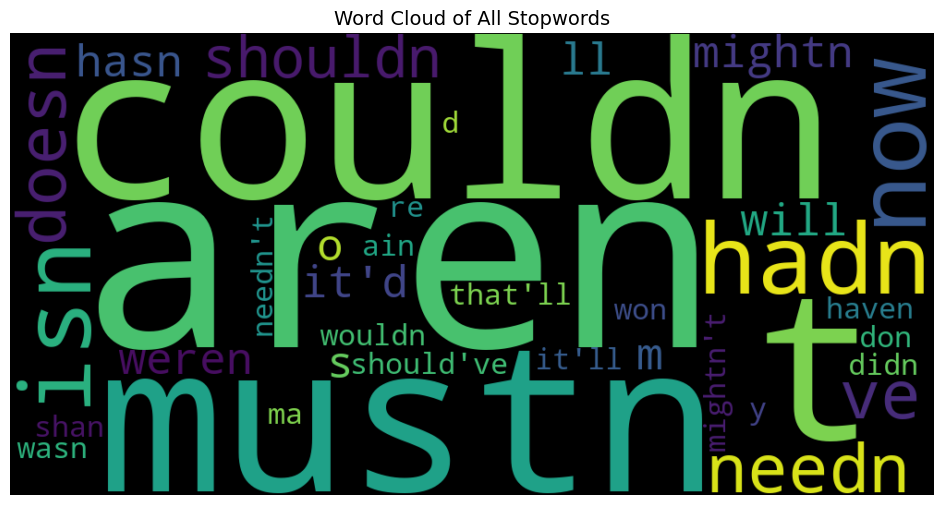

In [50]:
stopwords_text = ' '.join(stop_words)

wordcloud = WordCloud(width=1000, height=500, background_color='black', max_words=len(stop_words), colormap="viridis").generate(stopwords_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title("Word Cloud of All Stopwords", fontsize=14)
plt.show()

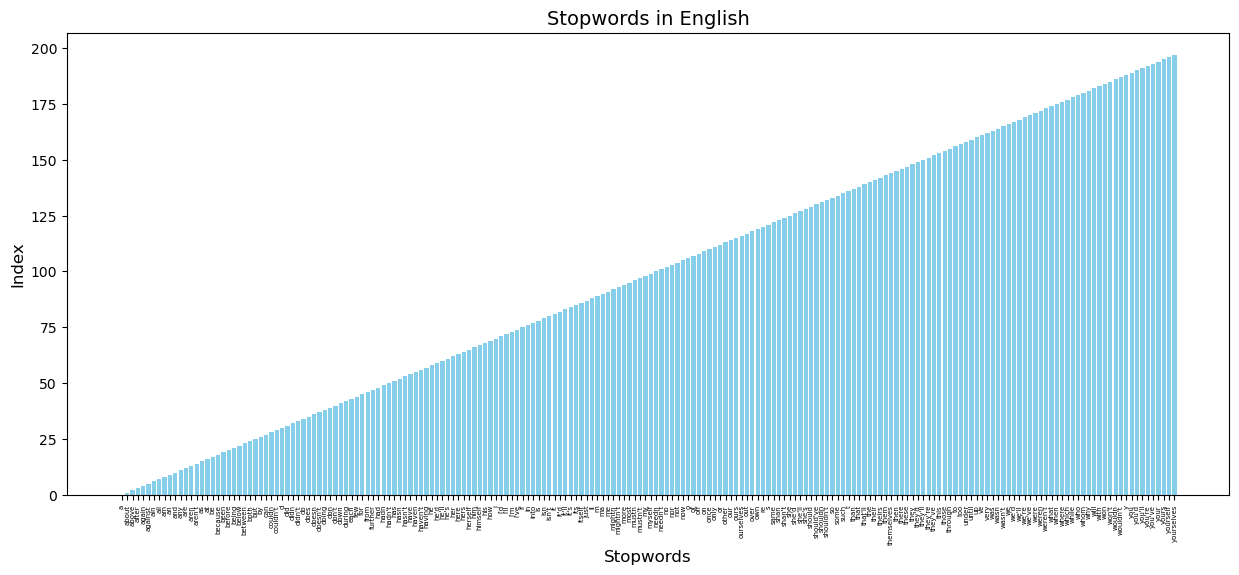

In [51]:
stop_words = sorted(set(stopwords.words('english')))

plt.figure(figsize=(15, 6)) 
plt.bar(stop_words, range(len(stop_words)), color='skyblue')
plt.xticks(rotation=90, fontsize=5)  
plt.xlabel("Stopwords", fontsize=12)
plt.ylabel("Index", fontsize=12)
plt.title("Stopwords in English", fontsize=14)
plt.show()

In [52]:
def stopword_removal(text):
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [53]:
emotion_df['text'] = emotion_df['text'].apply(stopword_removal)
violence_df['text'] = violence_df['text'].apply(stopword_removal)
hate_df['text'] = hate_df['text'].apply(stopword_removal)

In [54]:
emotion_df.head(5)

,text,label
0,ive learned surround women lift leave feeling ...,0
1,already feel crappy upset situation doesnt help,0
2,feel like lost mourned moved past tears relati...,0
3,could write whole lot im feeling crappy dont t...,0
4,always seem feel inadequate,0


In [55]:
violence_df.head(5)

,text,label
0,’ word person . science husband beats time . u...,1
1,Husband Beats - Housewife Runs Court Help : 38...,1
2,gnarly bruise forearm getting blood drawn . Pe...,1
3,’ nothing . got Beats Solo3 husband salty ’ pi...,1
4,"Damn , got ta choose Black KKKlansmen Husband ...",1


In [56]:
hate_df.head(5)

,text,label
0,RT @ chicagotribune : Chicago refund $ 7.7 mil...,2
1,"Sometimes , even got ta tell hoes grow smh",2
2,& # 8216 ; Chillin & # 8217 ; Homie & # 8217 ;...,2
3,. @ CoryBooker running around town delivering ...,2
4,RT @ McNarstle : ... rounding CNN Ebola panel ...,2


# TOKENIZATION AND PADDING

In [57]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hate_df['text']]))

In [58]:
emotion_seq = tokenizer.texts_to_sequences(emotion_df['text'])
violence_seq = tokenizer.texts_to_sequences(violence_df['text'])
hate_seq = tokenizer.texts_to_sequences(hate_df['text'])

In [59]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [60]:
emotion_seq[2]

[1, 4, 317, 7819, 1122, 413, 1036, 356]

In [61]:
violence_df['text'].iloc[3]

'’ nothing . got Beats Solo3 husband salty ’ pick . done hella gaming headphones . deserve !'

In [62]:
violence_seq[3]

[3, 125, 19, 7, 14208, 5, 4804, 3, 706, 204, 2639, 5591, 1652, 619]

In [63]:
hate_df['text'].iloc[4]

'RT @ McNarstle : ... rounding CNN Ebola panel tonight , monkey 1995 film , OUTBREAK .'

In [64]:
hate_seq[4]

[9, 7518, 19903, 4351, 3175, 10421, 528, 481, 19904, 1392, 10433]

In [65]:
max_length = 50
emotion_padded = pad_sequences(emotion_seq, maxlen = max_length, padding = 'post')
violence_padded = pad_sequences(violence_seq, maxlen = max_length, padding = 'post')
hate_padded = pad_sequences(hate_seq, maxlen = max_length, padding = 'post')

In [66]:
emotion_padded[2]

array([   1,    4,  317, 7819, 1122,  413, 1036,  356,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [67]:
violence_padded[3]

array([    3,   125,    19,     7, 14208,     5,  4804,     3,   706,
         204,  2639,  5591,  1652,   619,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0])

In [68]:
hate_padded[4]

array([    9,  7518, 19903,  4351,  3175, 10421,   528,   481, 19904,
        1392, 10433,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0])

In [69]:
emotion_label = np.array(emotion_df['label'])
violence_label = np.array(violence_df['label'])
hate_label = np.array(hate_df['label'])

In [70]:
emotion_label

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [71]:
violence_label

array([1, 1, 1, ..., 2, 3, 2])

In [72]:
hate_label

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

## MODEL DEFINITION

In [73]:
# PREPARE SEPERATE INPUTS FOR EACH DATASET
emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [74]:
#DEFINING MULTIPLE INPUT LAYERS
emotion_input_layer = keras.layers.Input(shape = (max_length,), name = 'emotion_input')
violence_input_layer = keras.layers.Input(shape = (max_length,), name = 'violence_input')
hate_input_layer = keras.layers.Input(shape = (max_length,), name = 'hate_input')

In [75]:
#SHARED EMBEDDING LAYER
embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 128)

In [76]:
#APPLY THE EMBEDDING LAYER TO EACH INPUT
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [77]:
#SHARED LSTM LAYER
shared_lstm = keras.layers.LSTM(64, return_sequences = True)

In [78]:
#APPLY THE LSTM LAYER TO EACH INPUT
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [79]:
#SHARED GLOBAL AVERAGE LAYER AN DROPOUT LAYER
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [80]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [81]:
len(emotion_df['label'].unique()), len(violence_df['label'].unique()), len(hate_df['label'].unique())

(6, 5, 3)

In [82]:
#OUTPUT LAYERS
emotion_output = keras.layers.Dense(6, activation='softmax', name='emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5, activation='softmax', name='violence_output')(violence_features)  # Changed from 6 to 5
hate_output = keras.layers.Dense(3, activation='softmax', name='hate_output')(hate_features)  # Kept as 3

In [83]:
#COMPILATION
model = keras.models.Model(inputs = [emotion_input_layer, violence_input_layer, hate_input_layer],
                           outputs = [emotion_output, violence_output, hate_output])

model.compile(optimizer = 'adam',
             loss = {
                 'emotion_output' : 'sparse_categorical_crossentropy',
                 'violence_output' : 'sparse_categorical_crossentropy',
                 'hate_output' : 'sparse_categorical_crossentropy'
             },
             metrics = {
                 'emotion_output' : 'accuracy',
                 'violence_output' : 'accuracy',
                 'hate_output' : 'accuracy'
             })

In [84]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ emotion_input (InputLayer)    │ (None, 50)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ violence_input (InputLayer)   │ (None, 50)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ hate_input (InputLayer)       │ (None, 50)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 50, 128)           │       3,577,856 │ emotion_input[0][0],       │
│                               │                           │                 │ violence_input[0][0],      │
│                               │                           │                 │ hate_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 50, 64)            │          49,408 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0],           │
│                               │                           │                 │ embedding[2][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 64)                │               0 │ lstm[0][0], lstm[1][0],    │
│ (GlobalAveragePooling1D)      │                           │                 │ lstm[2][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 64)                │               0 │ global_average_pooling1d[… │
│                               │                           │                 │ global_average_pooling1d[… │
│                               │                           │                 │ global_average_pooling1d[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ emotion_output (Dense)        │ (None, 6)                 │             390 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ violence_output (Dense)       │ (None, 5)                 │             325 │ dropout[1][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ hate_output (Dense)           │ (None, 3)                 │             195 │ dropout[2][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 3,628,174 (13.84 MB)

 Trainable params: 3,628,174 (13.84 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
from sklearn.model_selection import train_test_split

# Splitting Data (80% train, 20% test)
emotion_train, emotion_test, emotion_label_train, emotion_label_test = train_test_split(emotion_input, emotion_label, test_size=0.2, random_state=42)
violence_train, violence_test, violence_label_train, violence_label_test = train_test_split(violence_input, violence_label, test_size=0.2, random_state=42)
hate_train, hate_test, hate_label_train, hate_label_test = train_test_split(hate_input, hate_label, test_size=0.2, random_state=42)

# Training
model.fit(
    x={'emotion_input': emotion_train, 'violence_input': violence_train, 'hate_input': hate_train},
    y={'emotion_output': emotion_label_train, 'violence_output': violence_label_train, 'hate_output': hate_label_train},
    epochs=5,
    batch_size=4,
    validation_data=(
        {'emotion_input': emotion_test, 'violence_input': violence_test, 'hate_input': hate_test},
        {'emotion_output': emotion_label_test, 'violence_output': violence_label_test, 'hate_output': hate_label_test}
    )
)


Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 172s 143ms/step - emotion_output_accuracy: 0.8153 - hate_output_accuracy: 0.9611 - loss: 0.9850 - violence_output_accuracy: 0.8783 - val_emotion_output_accuracy: 0.7458 - val_hate_output_accuracy: 0.8842 - val_loss: 2.0047 - val_violence_output_accuracy: 0.6900
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 197s 165ms/step - emotion_output_accuracy: 0.9429 - hate_output_accuracy: 0.9839 - loss: 0.5759 - violence_output_accuracy: 0.9071 - val_emotion_output_accuracy: 0.8267 - val_hate_output_accuracy: 0.8950 - val_loss: 2.1679 - val_violence_output_accuracy: 0.6750
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 157s 131ms/step - emotion_output_accuracy: 0.9709 - hate_output_accuracy: 0.9855 - loss: 0.3721 - violence_output_accuracy: 0.9174 - val_emotion_output_accuracy: 0.8058 - val_hate_output_accuracy: 0.8875 - val_loss: 2.3063 - val_violence_output_accuracy: 0.6692
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 229s 191ms/step - emotion_output_accuracy: 0.9846 

## MODEL EVALUATION

In [87]:
prediction = model.predict({'emotion_input':emotion_input,
                           'violence_input':violence_input,
                           'hate_input':hate_input})

188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step


In [88]:
prediction

[array([[9.9950075e-01, 4.4752091e-05, 7.9404890e-06, 3.9364677e-04,
         5.1334460e-05, 1.5013771e-06],
        [9.9972051e-01, 1.3101165e-05, 2.1622066e-06, 2.4692187e-04,
         1.7018152e-05, 2.7984805e-07],
        [9.9969780e-01, 3.2157073e-05, 4.5791212e-06, 2.4162124e-04,
         2.3185410e-05, 6.6079446e-07],
        ...,
        [3.2247157e-05, 2.9290881e-04, 7.9984881e-04, 2.5050245e-05,
         3.5969780e-03, 9.9525297e-01],
        [4.1880332e-05, 2.4614483e-04, 1.6212541e-04, 2.4349543e-05,
         5.1407923e-04, 9.9901140e-01],
        [3.0631549e-04, 6.4541301e-04, 2.9796534e-04, 8.5087755e-04,
         1.7667350e-01, 8.2122594e-01]], dtype=float32),
 array([[4.48231222e-05, 9.99247193e-01, 4.96437242e-05, 5.20446687e-04,
         1.37884897e-04],
        [2.40713153e-02, 1.14507554e-02, 1.50590286e-01, 1.28452152e-01,
         6.85435474e-01],
        [5.86280985e-05, 9.98967290e-01, 6.98314470e-05, 7.17058661e-04,
         1.87233323e-04],
        ...,
      

In [89]:
emotion_pred = np.argmax(prediction[0], axis = 1)
violence_pred = np.argmax(prediction[1], axis = 1)
hate_pred = np.argmax(prediction[2], axis = 1)

In [90]:
violence_df['label'].unique()

array([1, 4, 3, 0, 2])

In [91]:
def plot_cm(true, pred, title, labels):
    cf = confusion_matrix(true, pred, normalize = 'true')
    plt.figure(figsize = (7,6))
    sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels = labels, yticklabels = labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice', 'economic violence']
hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

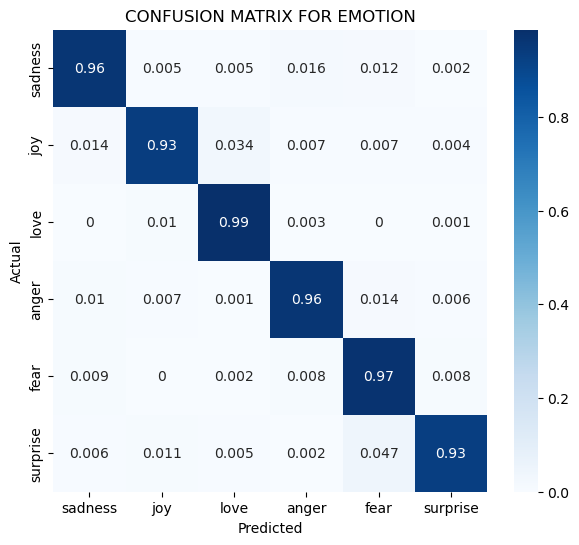

In [92]:
plot_cm(emotion_label, emotion_pred, 'CONFUSION MATRIX FOR EMOTION', emotion_labels_text)

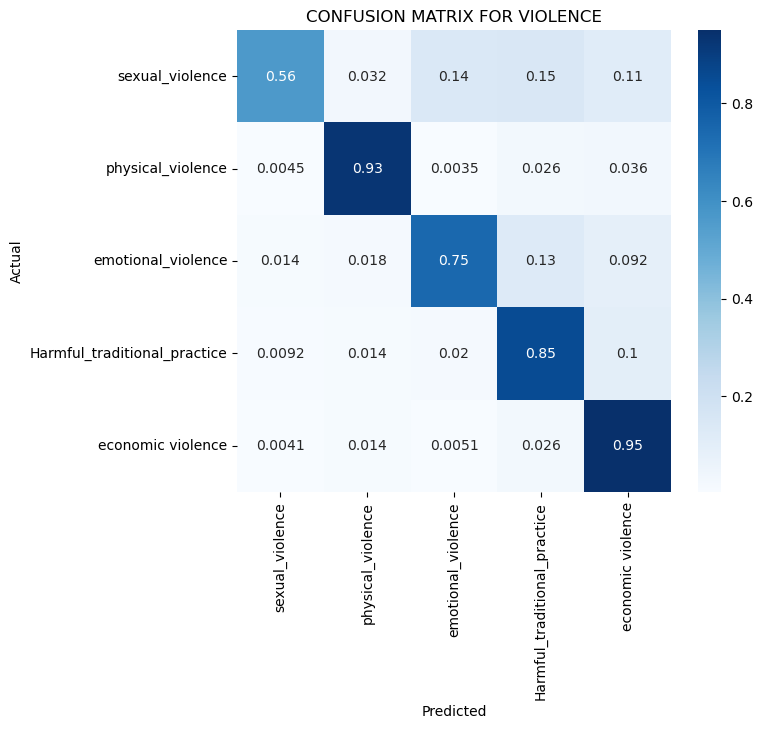

In [93]:
plot_cm(violence_label, violence_pred, 'CONFUSION MATRIX FOR VIOLENCE', violence_labels_text)

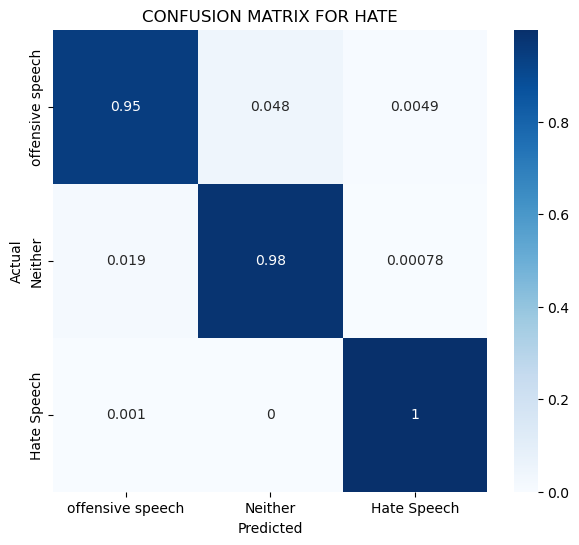

In [94]:
plot_cm(hate_label, hate_pred, 'CONFUSION MATRIX FOR HATE', hate_labels_text)

## MODEL SAVING

In [95]:
model.save("multi_model.h5")

In [96]:
import pickle

# Save tokenizer to a file
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle)
